In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import cv2

2024-03-29 21:03:35.076174: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 21:03:35.076237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 21:03:35.077712: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir='/kaggle/input/chest-xray-pneumonia/chest_xray/test'

In [3]:
os.path.exists(train_dir)

True

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-03-29 21:03:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: 'helper_functions.py.1'

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-03-29 21:03:39 (70.9 MB/s) - 'helper_functions.py.1' saved [10246/10246]



In [5]:
from helper_functions import *

In [6]:
walk_through_dir('/kaggle/input/chest-xray-pneumonia/chest_xray')

There are 5 directories and 0 images in '/kaggle/input/chest-xray-pneumonia/chest_xray'.
There are 3 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val'.
There are 0 directories and 9 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/PNEUMONIA'.
There are 0 directories and 9 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/val/NORMAL'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test'.
There are 0 directories and 390 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/PNEUMONIA'.
There are 0 directories and 234 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/test/NORMAL'.
There are 2 directories and 1 images in '/kaggle/input/chest-xray-pneumonia/chest_xray/chest_xray/train'.
There are 0 directories and 3876 images 

In [7]:
from tensorflow import keras 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization,MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
data_aug=ImageDataGenerator(
     tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
    tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
)

/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [10]:
train=data_aug.flow_from_directory(directory=train_dir,target_size=(224,224),batch_size=32,class_mode="binary")
test=data_aug.flow_from_directory(directory=test_dir,target_size=(224,224),batch_size=32,class_mode="binary")
val=data_aug.flow_from_directory(directory=val_dir,target_size=(224,224),batch_size=32,class_mode="binary")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [11]:
train

In [12]:
from tensorflow.keras import Sequential

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers

model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu' , kernel_regularizer=regularizers.l2(0.01), input_shape = (224,224,3)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'selu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'selu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid', kernel_regularizer=regularizers.l2(0.01)))

model.compile(optimizer = "adam" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 224, 224, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      2

In [14]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.00000001)
history = model.fit( train, batch_size = 32 ,epochs = 16 , validation_data =val ,callbacks = [learning_rate_reduction])

/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


Epoch 1/16


2024-03-29 21:03:53.485155: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1711746237.102245    1989 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


163/163 [==============================] - 60s 315ms/step - loss: 4.8101 - accuracy: 0.9178 - val_loss: 21.0819 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/16
163/163 [==============================] - 50s 304ms/step - loss: 1.7897 - accuracy: 0.9559 - val_loss: 13.0587 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/16
163/163 [==============================] - ETA: 0s - loss: 0.8921 - accuracy: 0.9469
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 51s 312ms/step - loss: 0.8921 - accuracy: 0.9469 - val_loss: 2.0721 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/16
163/163 [==============================] - 52s 320ms/step - loss: 0.5326 - accuracy: 0.9720 - val_loss: 2.6711 - val_accuracy: 0.5625 - lr: 3.0000e-04
Epoch 5/16
163/163 [==============================] - 52s 318ms/step - loss: 0.4131 - accuracy: 0.9712 - val_loss: 0.7574 - val_accuracy: 0.7500 - lr: 3.0000e-04
Epoch 6/16
163/163 [==============================

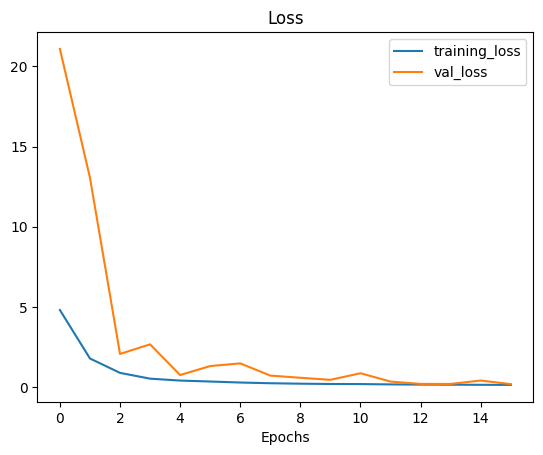

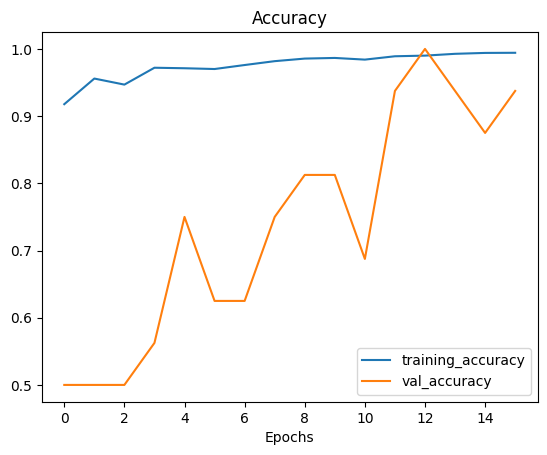

In [15]:
from helper_functions import *
plot_loss_curves(history)

In [40]:
print(test.class_names)

AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [64]:
y_pred = model.predict(test)
y_pred_binary = (y_pred > 0.4).astype(int)
y_true = test.labels
class_indices = test.class_indices
print("Class Indices:", class_indices)
cm = confusion_matrix(y_true, y_pred_binary)
print(cm)

/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1885: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


20/20 [==============================] - 5s 249ms/step
Class Indices: {'NORMAL': 0, 'PNEUMONIA': 1}
[[ 33 201]
 [ 60 330]]


In [65]:
class_names=list(class_indices.keys())

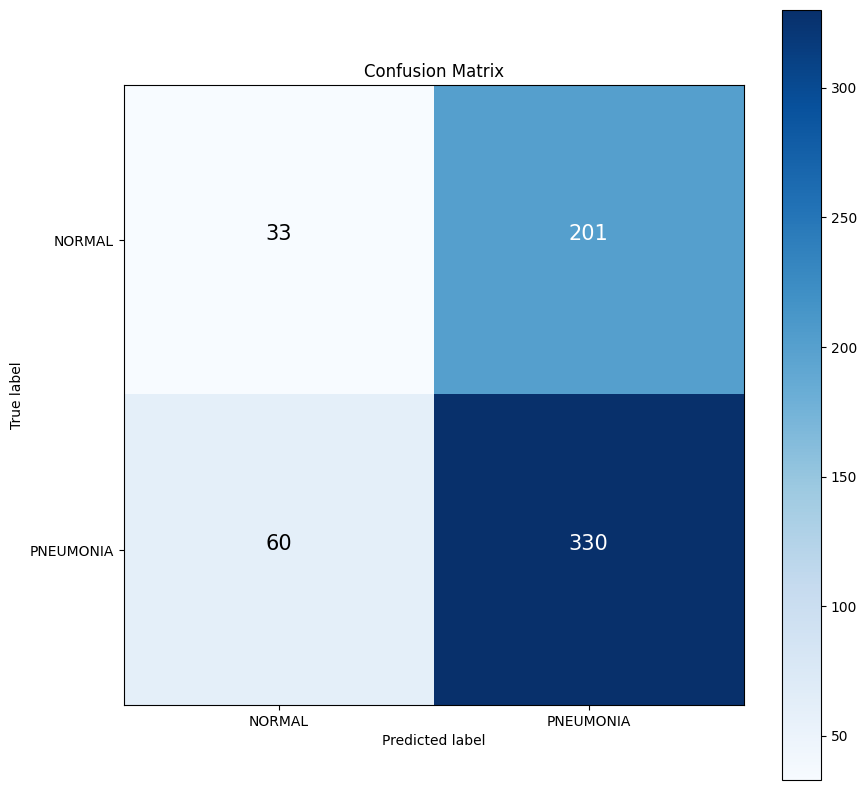

In [66]:
make_confusion_matrix(y_true,y_pred_binary,classes=class_names)

In [67]:
from sklearn.metrics import confusion_matrix

def get_Recall(tp, fn):
    recall = tp / (tp + fn)
    return recall
def get_Precision(tp, fp):
    precision = tp / (tp + fp)
    return precision
def get_F1score(recall, precision):
    f1_score = 2 / ((1 / precision) + (1 / recall))
    return f1_score
tn, fp, fn, tp = confusion_matrix(y_true, y_pred_binary).ravel()
recall = get_Recall(tp, fn)
precision = get_Precision(tp, fp)

f1_score = get_F1score(recall, precision)

print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1_score)


Recall: 0.8461538461538461
Precision: 0.6214689265536724
F1 Score: 0.7166123778501629


In [38]:
model.evaluate(test)

20/20 [==============================] - 6s 277ms/step - loss: 1.2828 - accuracy: 0.7708


[1.2828322649002075, 0.7708333134651184]

In [ ]:
model.save('Pnumonia_model.h5')